In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Input, Flatten, Dense, MaxPooling2D
#Though we won't be making any neural networks then still why are we including these layers because we don't want the output layer we only need the rest of the knowledge and at the output our output will be there that is only 2 neurons open eyes and closed eyes
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator  #this is for data augmentation

In [ ]:
# changes la rahe h images mei like rotate kr diya and original mei kuch nahi hoga sbki duplicate banegi hence 5 duplicates banegi ek ki (pata nahi sahi h ya nahi)
# rescale isliye kr rahe h kyunki hamari images bahot badi hai 1./255 means 255 pixels ki krdo (I guess)
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, validation_split=0.2)

In [ ]:
train_data = train_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Train', target_size=(80,80), batch_size=8, class_mode='categorical', subset='training' )
#ab hum is train data ko do hisso mei baatenge 1 is train data 80% and 1 is validation data 20%

validation_data = train_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Train', target_size=(80,80), batch_size=8, class_mode='categorical', subset='validation' )

Found 6417 images belonging to 2 classes.
Found 1603 images belonging to 2 classes.


In [ ]:
  test_datagen = ImageDataGenerator(rescale=1./255)

test_data = test_datagen.flow_from_directory('/content/drive/MyDrive/mrlEyes_2018_01/Test', target_size=(80,80), batch_size=8, class_mode='categorical')

Found 2353 images belonging to 2 classes.


In [ ]:
bmodel = VGG16(include_top=False, weights='imagenet', input_tensor=Input(shape=(80,80,3)))

hmodel = bmodel.output
hmodel = Flatten()(hmodel)
hmodel = Dense(64, activation='relu')(hmodel)
hmodel = Dropout(0.5)(hmodel)
hmodel = Dense(2, activation='softmax')(hmodel)

model = Model(inputs=bmodel.input, outputs = hmodel)
for layer in bmodel.layers:
  layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 80, 80, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 80, 80, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 80, 80, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 40, 40, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 40, 40, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 40, 40, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 20, 20, 128)       0     

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint('/content/drive/MyDrive/mrlEyes_2018_01/VGG16', monitor='val_loss', save_best_only=True, verbose=3)

earlystop = EarlyStopping(monitor='val_loss', patience=7, verbose=3, restore_best_weights=True)

learning_rate = ReduceLROnPlateau(monitor='val_loss', patience=3, verbose=3)

callbacks = [checkpoint, earlystop, learning_rate]

In [ ]:
batchsize = 8

In [ ]:
#isiko baar baar chalana hoga model save krne k baad
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
History = model.fit_generator(train_data, steps_per_epoch=train_data.samples//batchsize, validation_data=validation_data, validation_steps=validation_data.samples//batchsize,
                    callbacks = callbacks, epochs=30)

<ipython-input-10-b80ebd5e01c8>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(train_data, steps_per_epoch=train_data.samples//batchsize, validation_data=validation_data, validation_steps=validation_data.samples//batchsize,


Epoch 1/30
802/802 [==============================] - ETA: 0s - loss: 0.5129 - accuracy: 0.7391
Epoch 1: val_loss improved from inf to 0.65525, saving model to /content/drive/MyDrive/mrlEyes_2018_01/VGG16


802/802 [==============================] - 2037s 3s/step - loss: 0.5129 - accuracy: 0.7391 - val_loss: 0.6553 - val_accuracy: 0.5725 - lr: 0.0010
Epoch 2/30
802/802 [==============================] - ETA: 0s - loss: 0.3891 - accuracy: 0.8201
Epoch 2: val_loss improved from 0.65525 to 0.58747, saving model to /content/drive/MyDrive/mrlEyes_2018_01/VGG16


802/802 [==============================] - 790s 986ms/step - loss: 0.3891 - accuracy: 0.8201 - val_loss: 0.5875 - val_accuracy: 0.6156 - lr: 0.0010
Epoch 3/30
802/802 [==============================] - ETA: 0s - loss: 0.3733 - accuracy: 0.8306
Epoch 3: val_loss improved from 0.58747 to 0.49164, saving model to /content/drive/MyDrive/mrlEyes_2018_01/VGG16


802/802 [==============================] - 797s 994ms/step - loss: 0.3733 - accuracy: 0.8306 - val_loss: 0.4916 - val_accuracy: 0.7738 - lr: 0.0010
Epoch 4/30
802/802 [==============================] - ETA: 0s - loss: 0.3432 - accuracy: 0.8457
Epoch 4: val_loss improved from 0.49164 to 0.45929, saving model to /content/drive/MyDrive/mrlEyes_2018_01/VGG16


802/802 [==============================] - 799s 997ms/step - loss: 0.3432 - accuracy: 0.8457 - val_loss: 0.4593 - val_accuracy: 0.7956 - lr: 0.0010
Epoch 5/30
802/802 [==============================] - ETA: 0s - loss: 0.3354 - accuracy: 0.8480
Epoch 5: val_loss did not improve from 0.45929
802/802 [==============================] - 733s 914ms/step - loss: 0.3354 - accuracy: 0.8480 - val_loss: 0.4727 - val_accuracy: 0.7437 - lr: 0.0010
Epoch 6/30
802/802 [==============================] - ETA: 0s - loss: 0.3179 - accuracy: 0.8577
Epoch 6: val_loss improved from 0.45929 to 0.43526, saving model to /content/drive/MyDrive/mrlEyes_2018_01/VGG16


802/802 [==============================] - 735s 916ms/step - loss: 0.3179 - accuracy: 0.8577 - val_loss: 0.4353 - val_accuracy: 0.8125 - lr: 0.0010
Epoch 7/30
802/802 [==============================] - ETA: 0s - loss: 0.3152 - accuracy: 0.8639
Epoch 7: val_loss did not improve from 0.43526
802/802 [==============================] - 791s 987ms/step - loss: 0.3152 - accuracy: 0.8639 - val_loss: 0.4596 - val_accuracy: 0.7713 - lr: 0.0010
Epoch 8/30
802/802 [==============================] - ETA: 0s - loss: 0.3140 - accuracy: 0.8618
Epoch 8: val_loss did not improve from 0.43526
802/802 [==============================] - 738s 920ms/step - loss: 0.3140 - accuracy: 0.8618 - val_loss: 0.4628 - val_accuracy: 0.7688 - lr: 0.0010
Epoch 9/30
802/802 [==============================] - ETA: 0s - loss: 0.3068 - accuracy: 0.8663
Epoch 9: val_loss did not improve from 0.43526

Epoch 9: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
802/802 [==============================] - 730s 9

802/802 [==============================] - 792s 989ms/step - loss: 0.2760 - accuracy: 0.8834 - val_loss: 0.4190 - val_accuracy: 0.8075 - lr: 1.0000e-04
Epoch 11/30
802/802 [==============================] - ETA: 0s - loss: 0.2663 - accuracy: 0.8914
Epoch 11: val_loss improved from 0.41896 to 0.41242, saving model to /content/drive/MyDrive/mrlEyes_2018_01/VGG16


802/802 [==============================] - 737s 919ms/step - loss: 0.2663 - accuracy: 0.8914 - val_loss: 0.4124 - val_accuracy: 0.8000 - lr: 1.0000e-04
Epoch 12/30
802/802 [==============================] - ETA: 0s - loss: 0.2608 - accuracy: 0.8930
Epoch 12: val_loss did not improve from 0.41242
802/802 [==============================] - 790s 985ms/step - loss: 0.2608 - accuracy: 0.8930 - val_loss: 0.4510 - val_accuracy: 0.7894 - lr: 1.0000e-04
Epoch 13/30
802/802 [==============================] - ETA: 0s - loss: 0.2693 - accuracy: 0.8903
Epoch 13: val_loss did not improve from 0.41242
802/802 [==============================] - 785s 979ms/step - loss: 0.2693 - accuracy: 0.8903 - val_loss: 0.4298 - val_accuracy: 0.8087 - lr: 1.0000e-04
Epoch 14/30
802/802 [==============================] - ETA: 0s - loss: 0.2584 - accuracy: 0.8928
Epoch 14: val_loss did not improve from 0.41242

Epoch 14: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
802/802 [=====================

802/802 [==============================] - 793s 989ms/step - loss: 0.2559 - accuracy: 0.8933 - val_loss: 0.4101 - val_accuracy: 0.8000 - lr: 1.0000e-05
Epoch 17/30
601/802 [=====================>........] - ETA: 2:27 - loss: 0.2479 - accuracy: 0.8929

UnknownError: ignored

In [ ]:
from keras.models import load_model

In [ ]:
model.save('/content/drive/MyDrive/mrlEyes_2018_01/VGG16/myModel/vgg16_model.h5')

In [ ]:
new_model = load_model('/content/drive/MyDrive/mrlEyes_2018_01/VGG16/myModel/vgg16_model.h5')

In [ ]:
loss_train, acc_train = new_model.evaluate_generator(train_data, steps = 16)
print(acc_train)
print(loss_train)

<ipython-input-17-bafa75701154>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_train, loss_train = new_model.evaluate_generator(train_data, steps = 16)


0.24124585092067719
0.921875


In [ ]:
loss_valid, acc_valid = new_model.evaluate_generator(validation_data, steps = 16)
print(acc_valid)
print(loss_valid)

<ipython-input-18-78fa9828eb6f>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_valid, loss_valid = new_model.evaluate_generator(validation_data, steps = 16)


0.34956425428390503
0.8359375


In [ ]:
loss_test, acc_test = new_model.evaluate_generator(test_data, steps = 16)
print(acc_test)
print(loss_test)

<ipython-input-19-2f97bf039bca>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  acc_test, loss_test = new_model.evaluate_generator(test_data, steps = 16)


0.2124611884355545
0.921875


In [ ]:
_loss = [0.5129, 0.3891, 0.3733, 0.3439, 0.3354, 0.3179, 0.3152, 0.3140, 0.3068, 0.2760, 0.2663, 0.2608, 0.2693, 0.2584, 0.2441, 0.2559]
_accuracy = [0.7391, 0.8201, 0.8306, 0.8457, 0.8480, 0.8577, 0.8639, 0.8618, 0.8663, 0.8834, 0.8914, 0.8930, 0.8903, 0.8928, 0.9070, 0.8933]
_val_loss = [0.6553, 0.5875, 0.4916, 0.4593, 0.4727, 0.4353, 0.4596, 0.4628, 0.4461, 0.4190, 0.4124, 0.4510, 0.4298, 0.4353, 0.4268, 0.4101]
_val_accuracy = [0.5725, 0.6156, 0.7738, 0.7956, 0.7437, 0.8125, 0.7713, 0.7688, 0.7987, 0.8075, 0.8000, 0.7894, 0.8087, 0.7894, 0.8000, 0.8000]

In [ ]:
_history = {'loss' : _loss, 'accuracy' : _accuracy, 'val_loss' : _val_loss, 'val_accuracy' : _val_accuracy}

In [ ]:
print(_history)

{'loss': [0.5129, 0.3891, 0.3733, 0.3439, 0.3354, 0.3179, 0.3152, 0.314, 0.3068, 0.276, 0.2663, 0.2608, 0.2693, 0.2584, 0.2441, 0.2559], 'accuracy': [0.7391, 0.8201, 0.8306, 0.8457, 0.848, 0.8577, 0.8639, 0.8618, 0.8663, 0.8834, 0.8914, 0.893, 0.8903, 0.8928, 0.907, 0.8933], 'val_loss': [0.6553, 0.5875, 0.4916, 0.4593, 0.4727, 0.4353, 0.4596, 0.4628, 0.4461, 0.419, 0.4124, 0.451, 0.4298, 0.4353, 0.4268, 0.4101], 'val_accuracy': [0.5725, 0.6156, 0.7738, 0.7956, 0.7437, 0.8125, 0.7713, 0.7688, 0.7987, 0.8075, 0.8, 0.7894, 0.8087, 0.7894, 0.8, 0.8]}


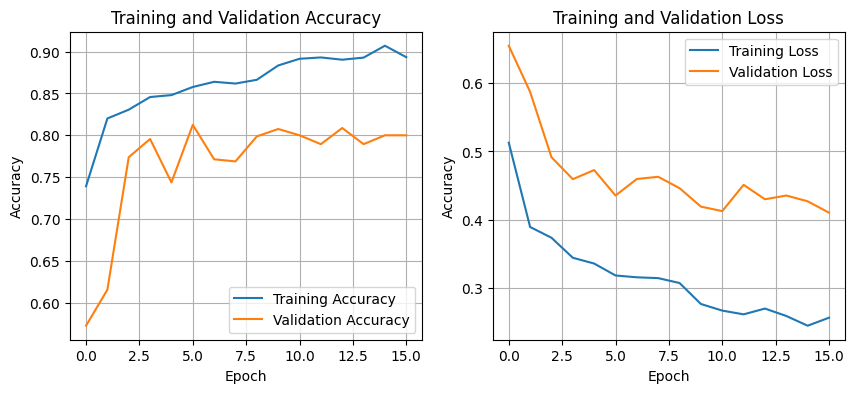

In [ ]:
import matplotlib.pyplot as plt
epochs = 16

acc = _history['accuracy']
val_acc = _history['val_accuracy']

loss = _history['loss']
val_loss = _history['val_loss']

epochs_range = range(epochs)
#plot traing and validation accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.grid()

#plot traing and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.grid()
plt.show()